### 1. ¿Qué es la Regresión Logística?

La **regresión logística** es un método de clasificación en machine learning que se utiliza para predecir si algo pertenece a una categoría (clase) o a otra. A diferencia de la regresión lineal, que predice un número (como la calificación que obtendrás en un examen), la regresión logística predice una probabilidad, es decir, la probabilidad de que algo ocurra o no. Imagina que tienes que predecir si un estudiante va a aprobar o no un examen basándote en el número de horas que ha estudiado. La regresión logística te ayuda a determinar la probabilidad de que apruebe, y a clasificar el resultado en "aprobado" o "no aprobado".


A nivel matemático, la regresión logística utiliza la función logística o sigmoide:

$$
P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n)}}
$$

Donde:

$$
P(Y=1)
$$
es la probabilidad de que el resultado sea la clase 1.

$$
\beta_0
$$
es el término de sesgo o intercepto.

$$
\beta_1, \beta_2, \ldots, \beta_n
$$
son los coeficientes que se aplican a cada una de las características.

$$
X_1, X_2, \ldots, X_n
$$.
En este caso sólo hay una característica que es la cantidad de horas estudiadas.



finalmente, e es la base del logaritmo natural, aproximadamente igual a 2.718.

### 2. Ejemplo: Prediciendo si un estudiante pasará un Examen

Supongamos que queremos predecir si un estudiante pasará un examen dependiendo de cuántas horas ha estudiado. La idea es que si ha estudiado más horas, es más probable que pase. Sin embargo, esto no es una relación lineal simple; por ejemplo, estudiar una hora podría no tener un gran impacto, pero estudiar diez horas podría casi garantizar el éxito.

**Descripción del Ejemplo:**

- **Entrada (X):** Número de horas estudiadas.
- **Salida (Y):** Resultado del examen (0 = No pasa, 1 = Pasa).

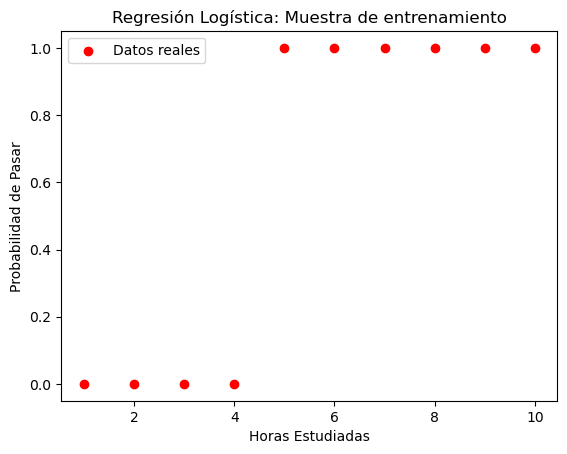

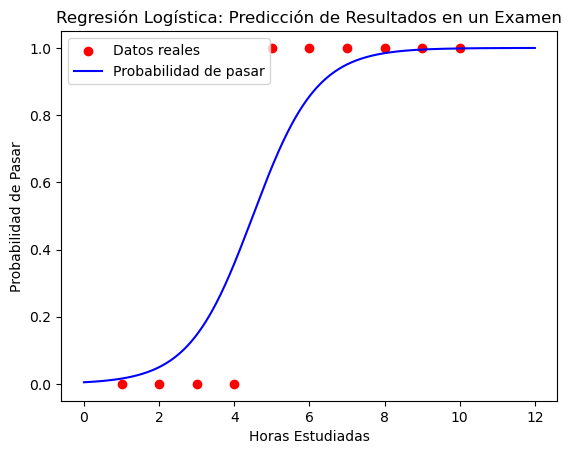

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Datos simulados: horas estudiadas y si pasaron o no el examen
horas_estudiadas = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
resultado_examen = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Crear y entrenar el modelo de regresión logística
# Es en este paso donde el sesgo o intercepto Beta_0 y los coeficientes Beta_n se definen y ajustan
modelo = LogisticRegression()
modelo.fit(horas_estudiadas.reshape(-1, 1), resultado_examen)

# Predecir probabilidades para una gama de horas estudiadas
horas_nuevas = np.linspace(0, 12, 1000).reshape(-1, 1)
probabilidades = modelo.predict_proba(horas_nuevas)[:, 1]

# Gráfico de los datos de entrenamiento
plt.scatter(horas_estudiadas, resultado_examen, color='red', label='Datos reales')
plt.xlabel('Horas Estudiadas')
plt.ylabel('Probabilidad de Pasar')
plt.title('Regresión Logística: Muestra de entrenamiento')
plt.legend()
plt.show()

# Gráfico de los resultados
plt.scatter(horas_estudiadas, resultado_examen, color='red', label='Datos reales')
plt.plot(horas_nuevas, probabilidades, color='blue', label='Probabilidad de pasar')
plt.xlabel('Horas Estudiadas')
plt.ylabel('Probabilidad de Pasar')
plt.title('Regresión Logística: Predicción de Resultados en un Examen')
plt.legend()
plt.show()



In [ ]:

print("Intercepto (β0):", modelo.intercept_[0])
print("Coeficiente (β1):", modelo.coef_[0][0])


Intercepto (β0): -5.311674343465787
Coeficiente (β1): 1.1819494300690527


In [ ]:

import pandas as pd

# Obtener probabilidades para las horas estudiadas originales
probabilidades_originales = modelo.predict_proba(horas_estudiadas.reshape(-1, 1))[:, 1]

# Crear un DataFrame con los datos
datos = pd.DataFrame({
    'Horas estudiadas': horas_estudiadas,
    'Probabilidad de aprobar': probabilidades_originales
})

print(datos)
# Guardar el DataFrame en un archivo CSV
datos.to_csv('probabilidades_regresion_logistica.csv', index=False)


   Horas estudiadas  Probabilidad de aprobar
0                 1                 0.015833
1                 2                 0.049842
2                 3                 0.146062
3                 4                 0.358041
4                 5                 0.645215
5                 6                 0.855700
6                 7                 0.950826
7                 8                 0.984387
8                 9                 0.995159
9                10                 0.998510


### Explicación de los Resultados y del Gráfico

1. **Datos Reales:** Los puntos rojos en el gráfico representan los datos reales. Por ejemplo, los estudiantes que estudiaron 4 horas o menos no pasaron el examen (etiquetados con 0), mientras que aquellos que estudiaron 5 horas o más pasaron el examen (etiquetados con 1).

2. **Curva de Probabilidad:** La línea azul representa la predicción de nuestro modelo de regresión logística. Muestra la probabilidad de pasar el examen dependiendo de cuántas horas se han estudiado.

   - Cuando alguien estudia pocas horas (por ejemplo, 1 o 2), la probabilidad de pasar es muy baja.
   - A medida que las horas de estudio aumentan, la probabilidad de pasar también aumenta.
   - Cerca de las 6-7 horas de estudio, la probabilidad de pasar es alta (cerca del 80-90%).
   - Si alguien estudia alrededor de 10 horas, el modelo predice que casi con certeza pasará el examen.

3. **Interpretación:** Este ejemplo muestra cómo la regresión logística puede tomar una característica continua (las horas de estudio) y predecir una probabilidad binaria (pasar o no pasar). El modelo no dice directamente "pasarás o no", sino que te da una probabilidad, que luego puedes usar para tomar decisiones. Por ejemplo, podrías decir que si la probabilidad es mayor al 50%, lo consideras como "pasar".

Este tipo de análisis es muy útil en la vida real, no solo para exámenes, sino también para decisiones como si alguien va a comprar un producto, si un paciente tiene cierta enfermedad, o si un correo electrónico es spam o no.

### 3. Mismo Escenario de ejemplo pero añadiendo variabilidad

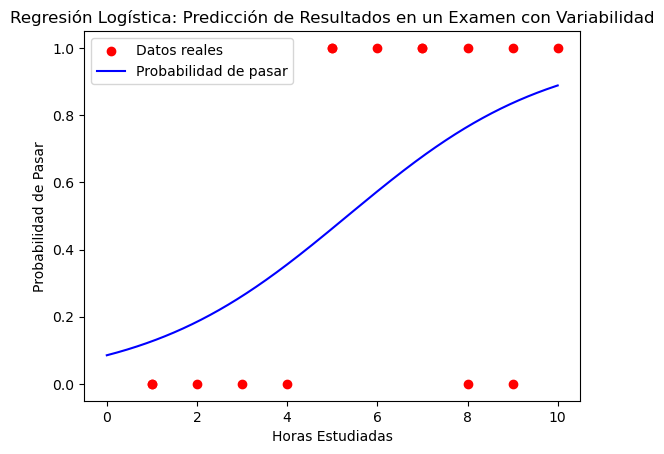

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Nuevos datos simulados: horas estudiadas y si pasaron o no el examen (con más variabilidad)
horas_estudiadas = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 8, 5, 7, 9])
resultado_examen = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0])

# Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(horas_estudiadas.reshape(-1, 1), resultado_examen)

# Predecir probabilidades para una gama de horas estudiadas
horas_nuevas = np.linspace(0, 10, 1000).reshape(-1, 1)
probabilidades = modelo.predict_proba(horas_nuevas)[:, 1]

# Gráfico de los resultados
plt.scatter(horas_estudiadas, resultado_examen, color='red', label='Datos reales')
plt.plot(horas_nuevas, probabilidades, color='blue', label='Probabilidad de pasar')
plt.xlabel('Horas Estudiadas')
plt.ylabel('Probabilidad de Pasar')
plt.title('Regresión Logística: Predicción de Resultados en un Examen con Variabilidad')
plt.legend()
plt.show()





In [ ]:

print("Intercepto (β0):", modelo.intercept_[0])
print("Coeficiente (β1):", modelo.coef_[0][0])


Intercepto (β0): -2.3727748971403235
Coeficiente (β1): 0.4446102156826775


In [ ]:

import pandas as pd

# Obtener probabilidades para las horas estudiadas originales
probabilidades_originales = modelo.predict_proba(horas_estudiadas.reshape(-1, 1))[:, 1]

# Crear un DataFrame con los datos
datos = pd.DataFrame({
    'Horas estudiadas': horas_estudiadas,
    'Probabilidad de aprobar': probabilidades_originales
})

datos_ordenados = datos.sort_values(by=['Probabilidad de aprobar'])

print(datos_ordenados)


    Horas estudiadas  Probabilidad de aprobar
0                  1                 0.126954
10                 1                 0.126954
1                  2                 0.184891
2                  3                 0.261354
3                  4                 0.355641
4                  5                 0.462639
12                 5                 0.462639
5                  6                 0.573192
6                  7                 0.676886
13                 7                 0.676886
7                  8                 0.765685
11                 8                 0.765685
8                  9                 0.835994
14                 9                 0.835994
9                 10                 0.888284


### Explicación de los Resultados y del Gráfico

1. **Datos Reales con Variabilidad**:
   - Ahora, los puntos rojos representan datos con más variabilidad. Por ejemplo:
     - **Algunos estudiantes aprobaron con pocas horas de estudio**
     - **Algunos estudiantes no aprobaron a pesar de estudiar muchas horas**
     - **Otros resultados son más esperables**: La mayoría de los estudiantes con 8 o más horas de estudio tienden a aprobar.

2. **Curva de Probabilidad Ajustada**:
   - La línea azul muestra la probabilidad de pasar el examen en función de las horas de estudio, ajustada a estos nuevos datos más realistas.
   - **Curva menos pronunciada**: Debido a la variabilidad, la curva es menos pronunciada que en el ejemplo anterior. Esto significa que el modelo no está tan seguro sobre cuándo exactamente alguien pasará el examen porque hay más variabilidad en los datos.
   - **Rango de incertidumbre más amplio**: La probabilidad de aprobar no sube tan rápidamente con las horas de estudio, y hay una mayor zona de "incertidumbre" donde la probabilidad está cerca del 50%. Esto refleja la realidad de que estudiar más no siempre garantiza aprobar.

3. **Interpretación**:
   - **Influencia de la Variabilidad**: Este ejemplo muestra que en situaciones reales, no siempre hay una relación clara y directa entre dos variables como horas de estudio y el resultado del examen. Otros factores podrían estar influyendo (como el nivel de dificultad del examen, cómo el estudiante estudió, etc.).
   - **Probabilidad en Decisiones Reales**: El modelo aún proporciona una probabilidad que puede ayudar en la toma de decisiones. Por ejemplo, si la probabilidad de aprobar es mayor al 70%, podrías considerarlo un buen indicador de que con un poco más de estudio, el estudiante podría estar seguro de aprobar.

Este ejemplo destaca cómo la regresión logística maneja situaciones con datos más variados y menos predecibles, reflejando mejor los escenarios del mundo real.